# The goal of this notebook is to visualize the predictions of a vector classifier model. The idea is to reconstuct the predicted maia FUNDUS and compare it to the real MAIA fundus. To do that, since we know that OCT's are lines on the MAIA fundus, every vector classification corresponds to a single pixel prediction on the MAIA fundus. We want to visualize this!
* Train a classifier
* Predict test OCTS, for which we need to have the hight in the Warped label

In [1]:
%matplotlib inline
from buildDataset import *
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay,f1_score
from matplotlib import image
from matplotlib import pyplot as plt
from PIL import Image


C:\Users\line\Desktop\Mauro\2_Preprocessing_Code\amd\prl\dataset.py:8: FutureWarning: The `skimage.morphology.selem` module is deprecated and will be removed in scikit-image 1.0 (`skimage.morphology.selem` has been moved to `skimage.morphology.footprints`).
  from skimage.morphology import selem


In [2]:
X_trainu, X_test, y_trainu, y_test = open_dataset(mode ='raw',normmode = 'EQ-hist',samplingmode = 'U')

In [ ]:
# SVM 
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf.fit(X_trainu, y_trainu)

y_true =y_test
y_pred = clf.predict(X_test)
print('recall_score: ',recall_score(y_true, y_pred))
print('precision_score: ',precision_score(y_true, y_pred))
print('accuracy_score: ',accuracy_score(y_true, y_pred))
print('f1: ',f1_score(y_true, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [10]:
def visualizePredictions(paths, mode,clf = None,rootpath = None,normmode = 'Z-score'):
    def normalize(img,mode = 'Z-score'):
        if mode == 'Z-score':
            normalized_img = dataset.z_score(img)
        elif mode == 'EQ-hist': 
            normalized_img = exposure.equalize_hist(img)
        elif mode == 'CLAHE':
            #TO Implement normalization by zone
            # Adaptive Equalization
            normalized_img = exposure.equalize_adapthist(img/max((img.max(),-img.min())), clip_limit=0.03)            
        return normalized_img
    
    def getxmax(rootpath):
        themax = 0
        allpaths =  glob.glob(os.path.join(root_path + '\*.pickle'))
        for path in allpaths:
            PPocts = pd.read_pickle(path)
            for PPoct in PPocts:
                xnew = PPoct.image()
                if(xnew.shape[0] > themax):
                    themax = xnew.shape[0]
        return themax
    
    if mode == 'thickness':
        #xmax is the number of layers
        xmax = 5 
    elif mode =='raw':
        xmax = getxmax(rootpath) 

    for path in paths:
        group = path.split("\\").pop().split("_")[0]
        print(f'GROUP: {group}')
        PPocts = pd.read_pickle(path)
        img = Image.fromarray(PPocts[0].full_label())
        plt.imshow(img)
        plt.axis('off')
        for PPoct in PPocts:
            if ((PPoct.full_label() != img)).any():
                plt.show()
                print("HERE")
                img = Image.fromarray(PPoct.full_label())
                plt.imshow(img)
            start = PPoct.scan_data().oct_scan.start
            xstart = start[0]
            ystart = start[1]
            end = PPoct.scan_data().oct_scan.end
            xend = end[0]
            yend = end[1]
            if mode == 'thickness':
                xnew = np.transpose(PPoct.thicknesses())
            elif mode == 'raw':
                xnew = np.transpose(normalize(PPoct.image(),mode = normmode))
                xnew = np.pad(xnew, ((0, 0), (xmax - xnew.shape[1], 0)), 'constant')
            ynew = PPoct.label()
            predictions = ynew#clf.predict(xnew)
            N = len(ynew)
            
            #to draw predictions
            seqX = [xstart + (xend - xstart)*(i/N) for i in range(N+1)] 
            seqY = [ystart + (yend - ystart)*(i/N) for i in range(N+1)] 

            # Draw predictions
            for i in range(N):
                if predictions[i] == 1:
                    plt.plot([seqY[i],seqY[i+1]],[seqX[i],seqX[i+1]], color="red", linewidth=0.5)
                else:
                    plt.plot([seqY[i],seqY[i+1]],[seqX[i],seqX[i+1]], color="blue", linewidth=0.5)
        
        plt.show()

the percentage of amd data, tha ended in the train set is 77.27272727272727
the percentage of control data, tha ended in the train set is 80.0
GROUP: amd


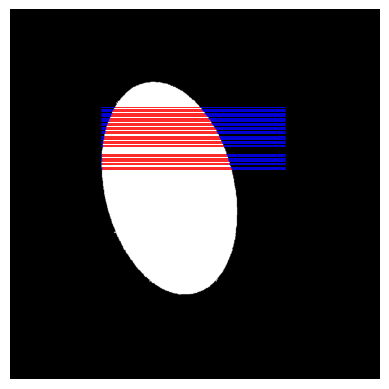

HERE


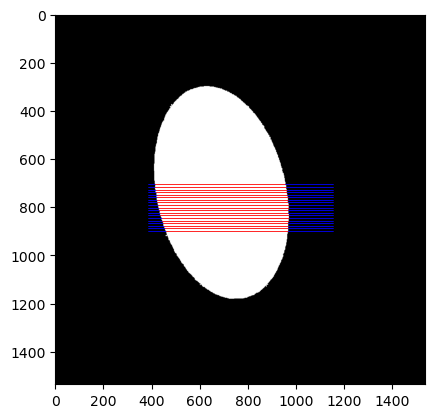

HERE


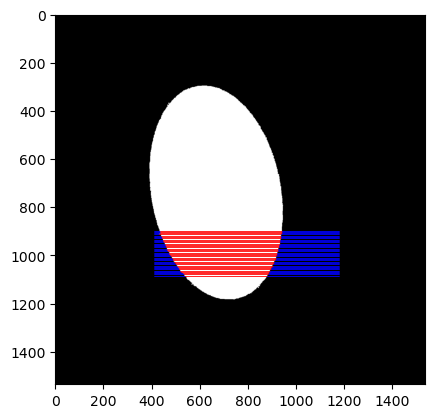

GROUP: amd


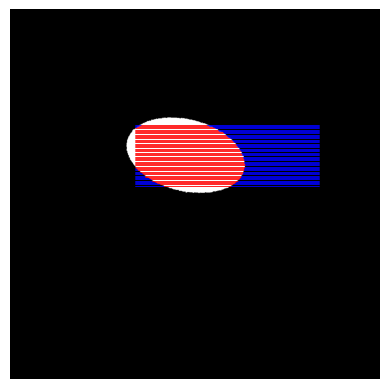

HERE


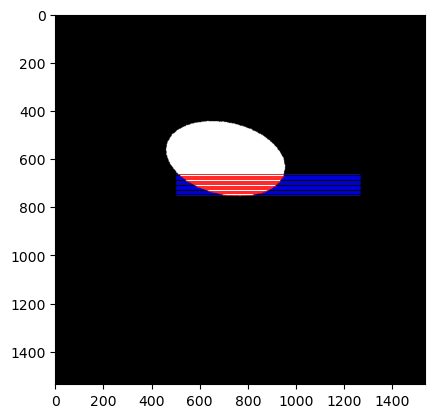

GROUP: amd


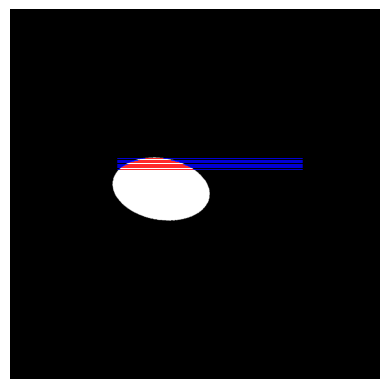

HERE


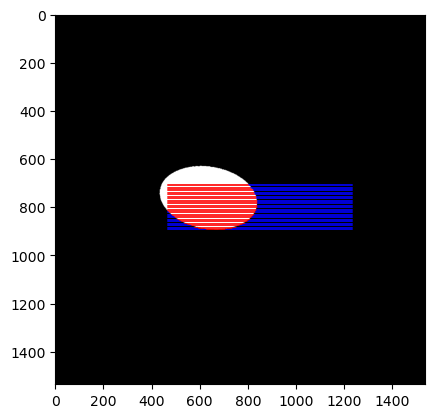

GROUP: amd


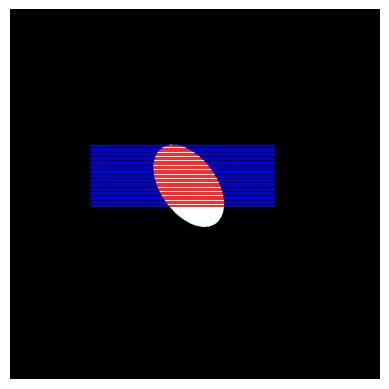

HERE


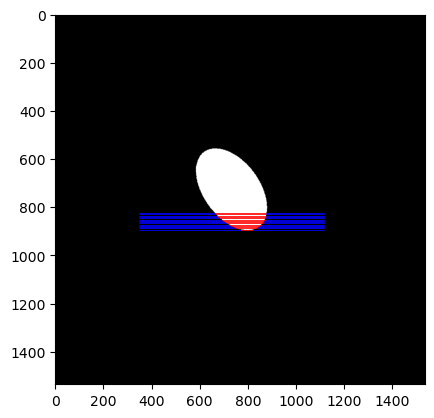

GROUP: amd


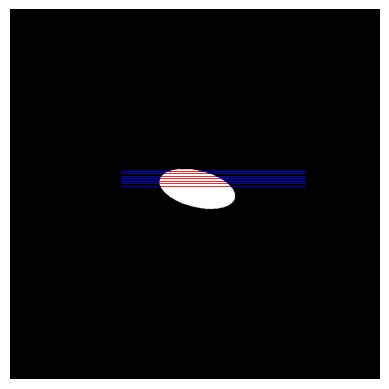

HERE


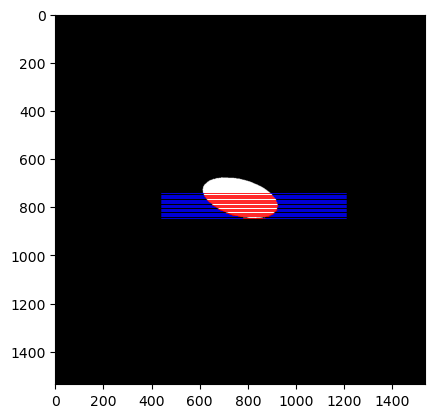

GROUP: amd


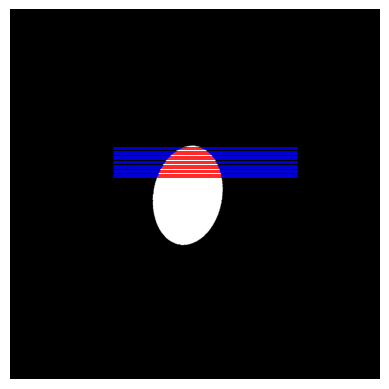

HERE


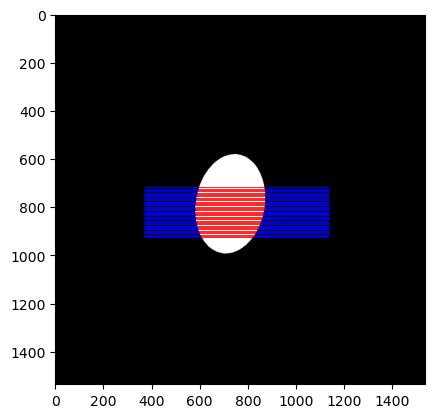

HERE


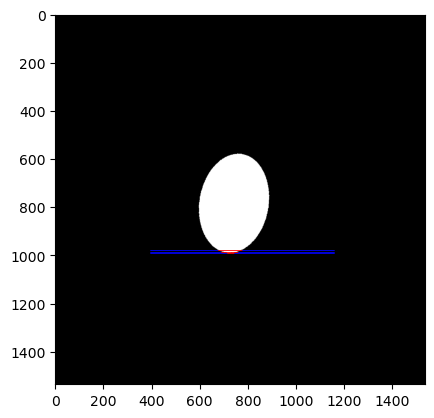

GROUP: amd


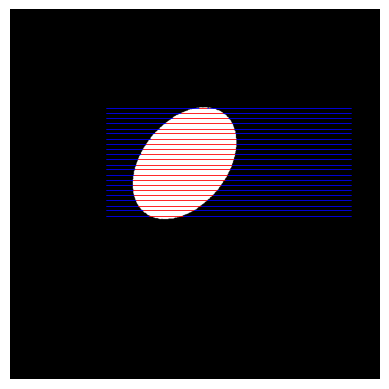

GROUP: amd


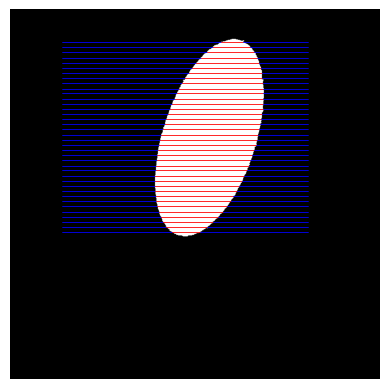

GROUP: control


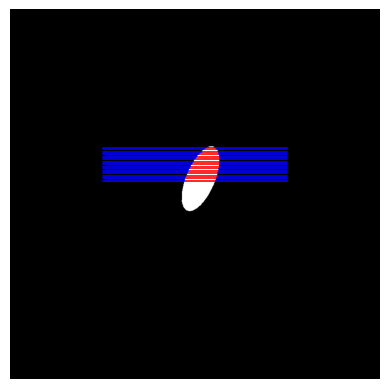

HERE


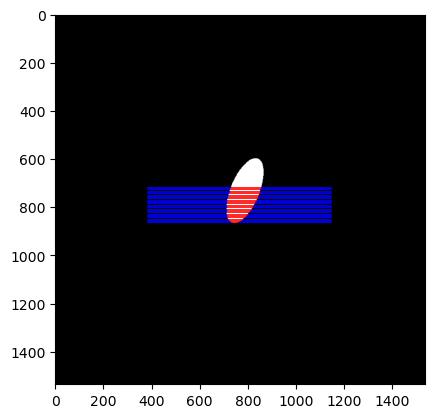

GROUP: control


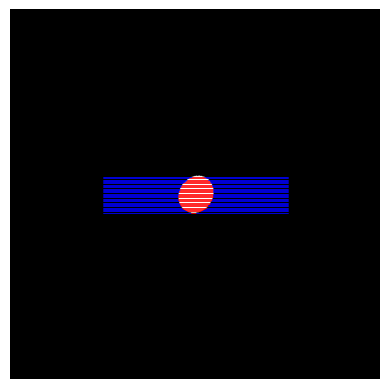

GROUP: control


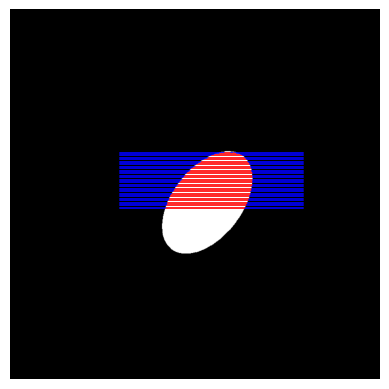

HERE


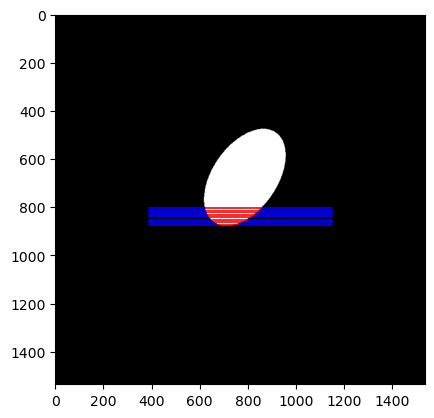

GROUP: control


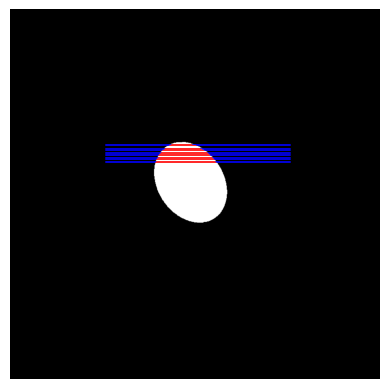

GROUP: control


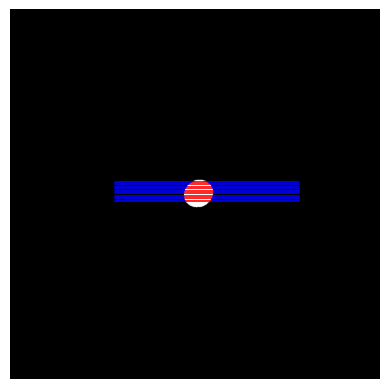

HERE


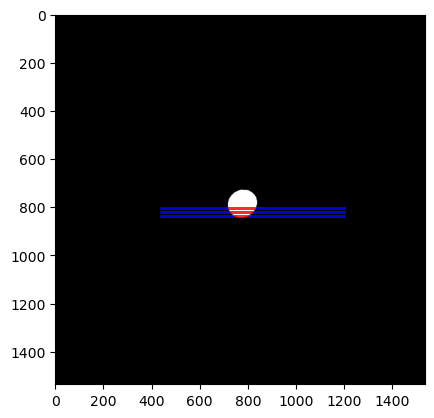

GROUP: control


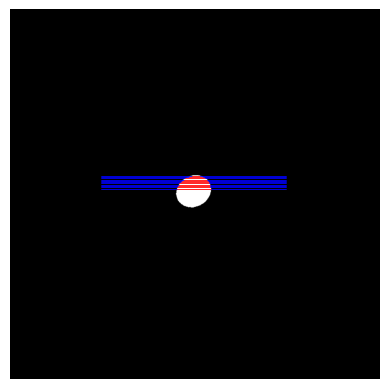

HERE


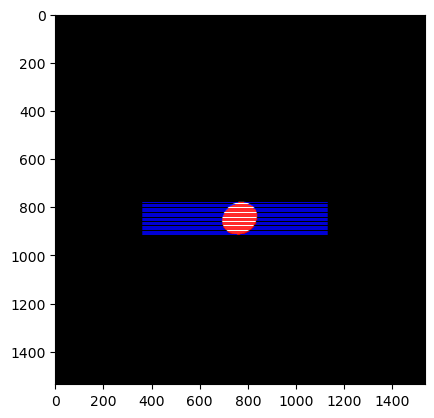

GROUP: control


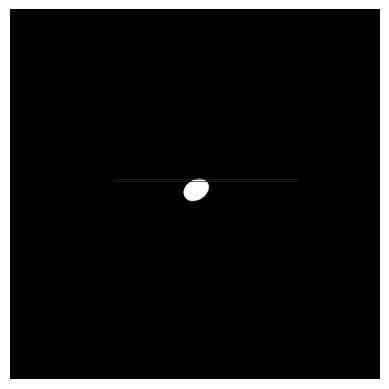

HERE


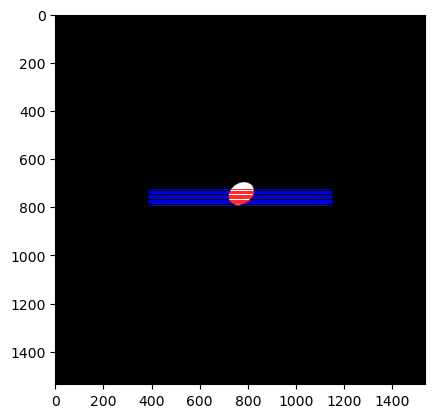

GROUP: control


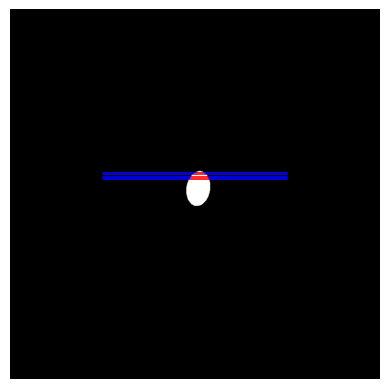

HERE


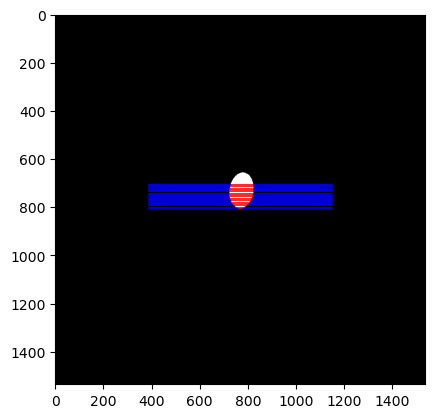

GROUP: control


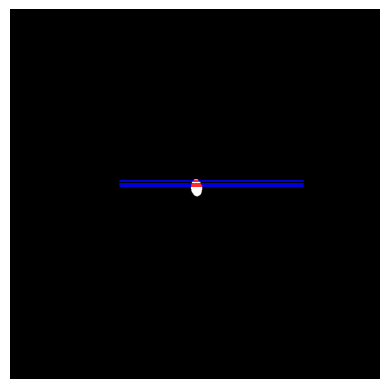

HERE


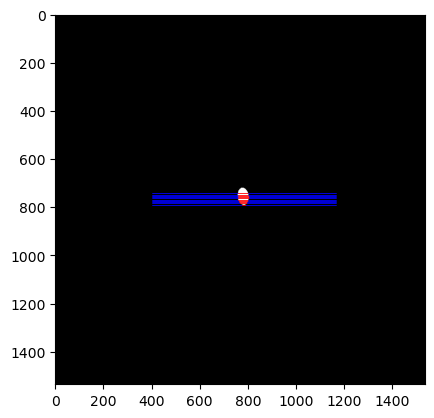

GROUP: control


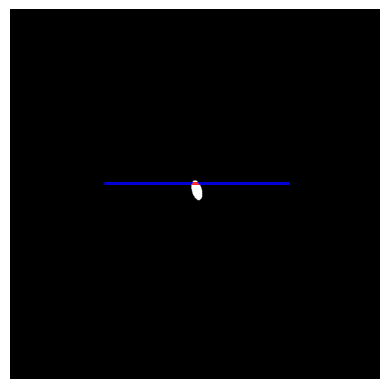

HERE


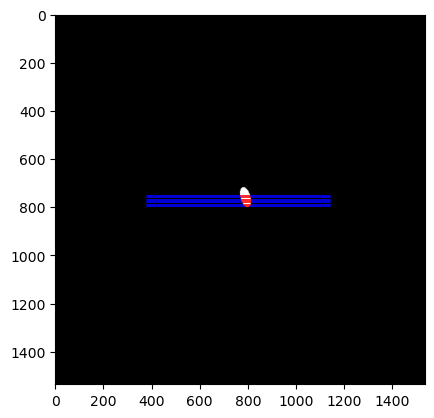

GROUP: control


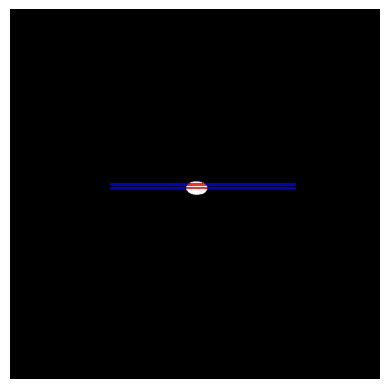

HERE


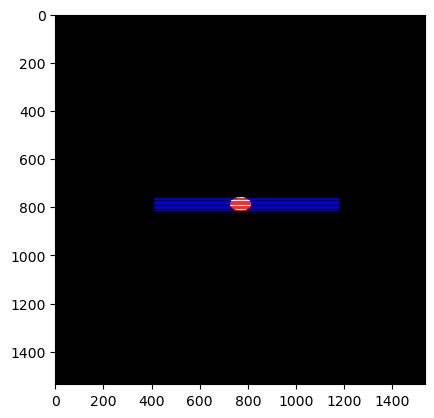

GROUP: control


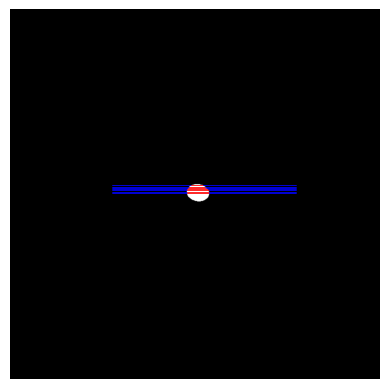

HERE


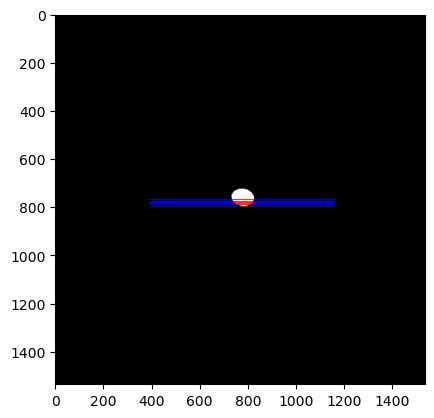

GROUP: control


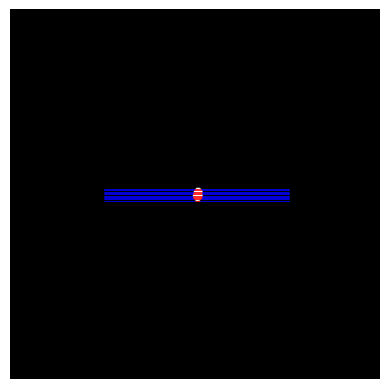

GROUP: control


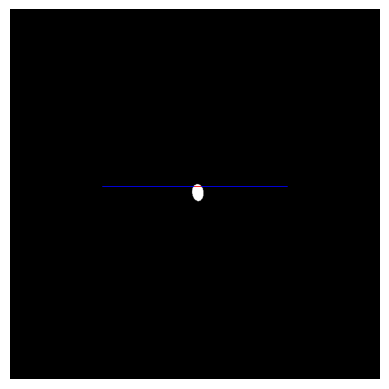

HERE


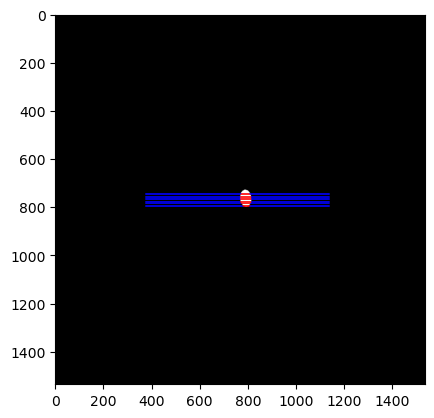

GROUP: control


IndexError: list index out of range

In [12]:
root_path =      DATAPATHS["preprocessed"]

trainpaths,testpaths = train_test_path_split(root_path)
visualizePredictions(trainpaths, 'raw',clf = None,rootpath = None,normmode = 'Z-score')

your goal was to train test split with 80.0 % amd train data, the real train amount is 77.27272727272727
your goal was to train test split with 80.0 % control train data, the real train amount is 80.0


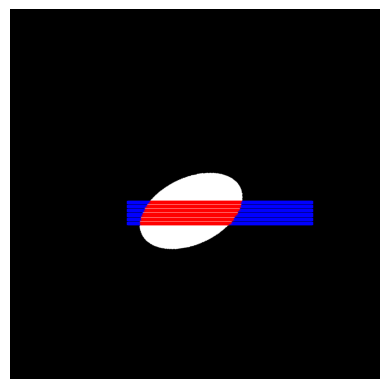

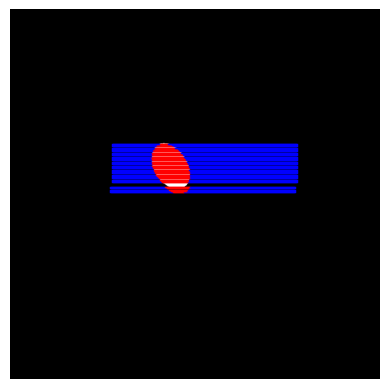

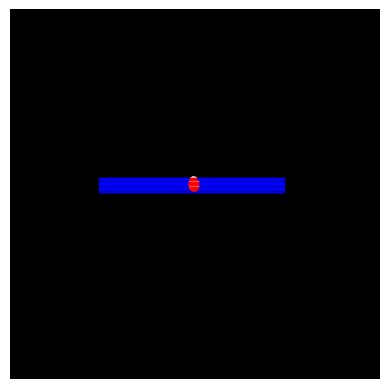

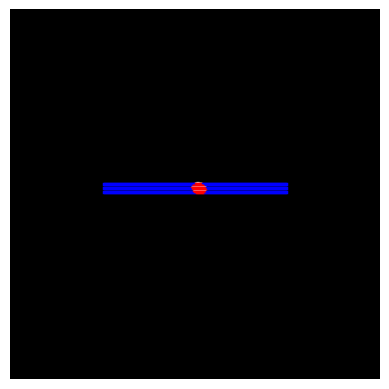

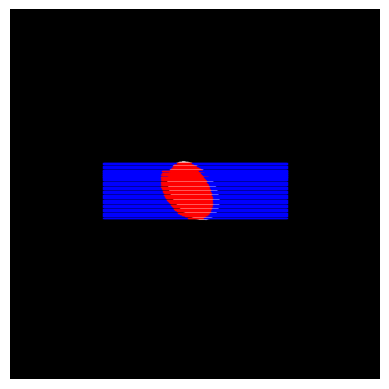

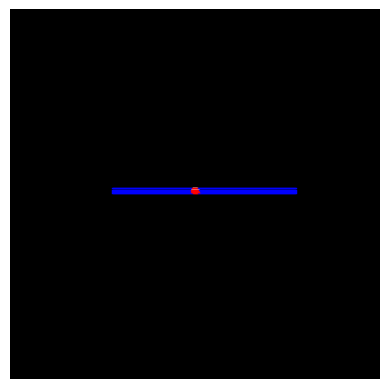

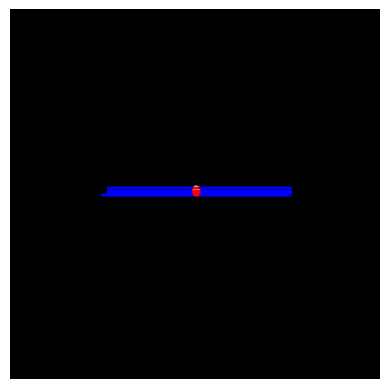

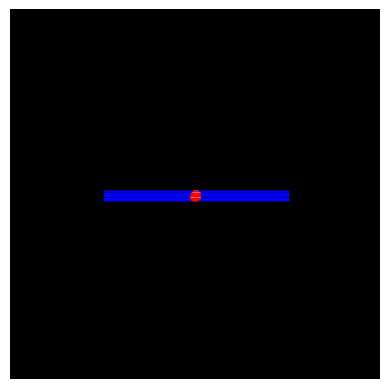

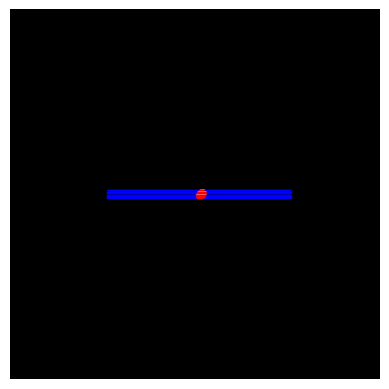

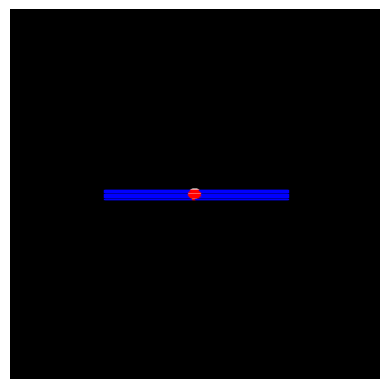

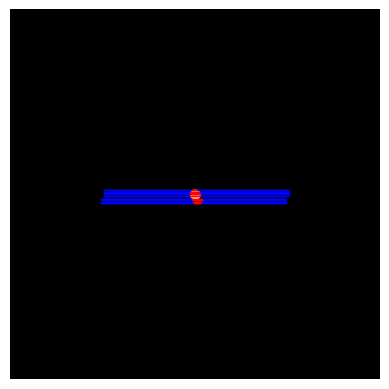

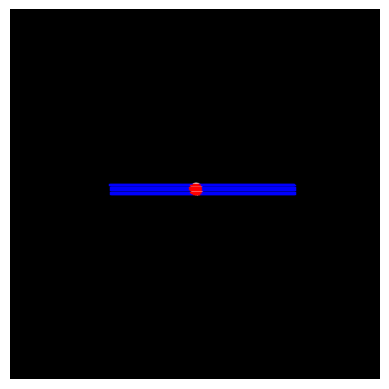

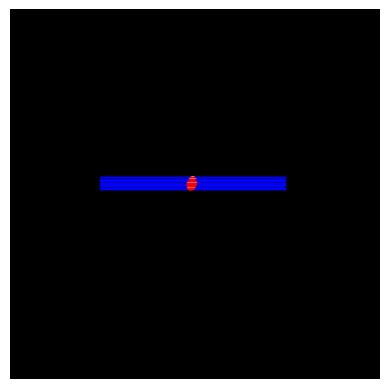

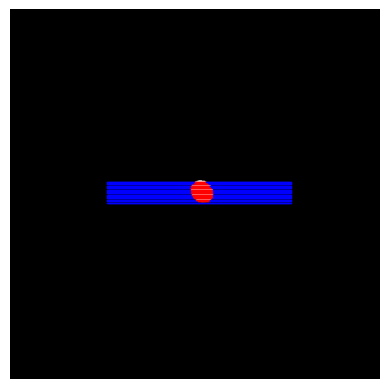

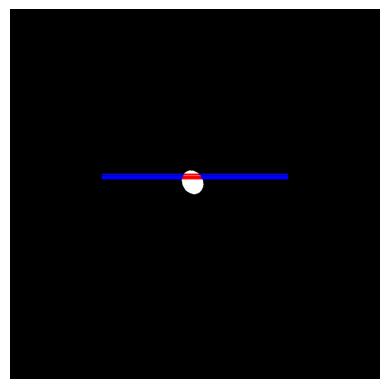

In [26]:
root_path =      DATAPATHS["preprocessed"]

trainpaths,testpaths = train_test_path_split(root_path)
visualizePredictions(testpaths, 'raw',clf,rootpath = None,normmode = 'Z-score')
